## Histogram Equalization of Black and White Image:
Histogram Equalization of a Black and White Image is fairly straight forward, and can be done using the hist_equalized function of OpenCV. The image after Histogram Equalization has Cumulative Distribution Function(CDF) as a **straight line**. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [2]:
# Reading the original image, here 0 implies that image is read as grayscale
image = cv2.imread('lc.jpeg', 0)

# Generating the histogram of the original image
hist,bins = np.histogram(image.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [3]:
# Applying Histogram Equalization on the original image
image_equalized = cv2.equalizeHist(image)

# Generating the histogram of the equalized image
hist_equalized,bins_equalized = np.histogram(image_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_equalized = hist_equalized.cumsum()
cdf_equalized_normalized = cdf_equalized * hist_equalized.max()/ cdf_equalized.max()

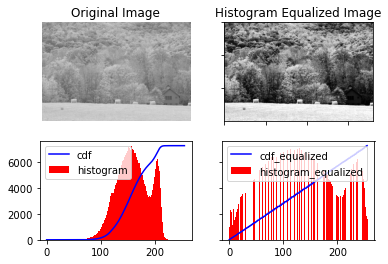

In [4]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_equalized, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_normalized, color = 'b')
axs[1, 0].hist(image.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_equalized_normalized, color = 'b')
axs[1, 1].hist(image_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Histogram Equalization of Color Images
Histogram Equalization of color images is a little complicated. OpenCV loads color images in BGR color space. With this color space, it is not possible to equalize the histogram without affecting to the color information because all 3 channels contain color information. Therefore you have to convert the BGR image to a color space like YCrCb. <br>
In YCrCb color space, the **Y channel** of the image only contains intensity information where as Cr and Cb channels contain all the color information of the image. Therefore only the Y channel should be processed to get a histogram equalized image without changing any color information.

In [13]:
# Reading the original image, here 1 implies that image is read as color
image_c = cv2.imread('lc.jpeg', 1)

# Generating the histogram of the original image
hist_c,bins_c = np.histogram(image_c.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [14]:
# Converting the image to YCrCb
image_yuv = cv2.cvtColor(image_c, cv2.COLOR_BGR2YUV)

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the YUV image back to RGB format
image_c_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Generating the histogram of the equalized image
hist_c_equalized, bins_c_equalized = np.histogram(image_c_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c_equalized = hist_c_equalized.cumsum()
cdf_c_equalized_normalized = cdf_c_equalized * hist_c_equalized.max()/ cdf_c_equalized.max()


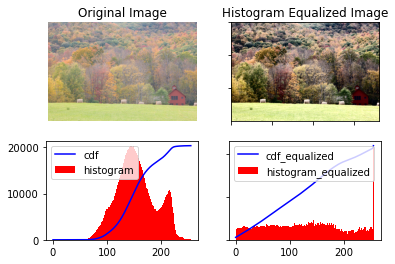

In [16]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(image_c.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_equalized_normalized, color = 'b')
axs[1, 1].hist(image_c_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()